In [1]:
import os
import csv

from matplotlib import pyplot as plt


def load_data(file_name, input_variable_name, output_variable_name):
    data = []
    data_names = []
    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1
    selected_variable = data_names.index(input_variable_name)
    input_list = [float(data[i][selected_variable]) for i in range(len(data))]
    selected_output = data_names.index(output_variable_name)
    output_list = [float(data[i][selected_output]) for i in range(len(data))]

    return input_list, output_list


crtDir = os.getcwd()
filePath = os.path.join(crtDir, 'data', 'v3_world-happiness-report-2017.csv')

inputs, outputs = load_data(filePath, 'Family', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

in:   [1.53352356, 1.551121593, 1.610574007, 1.516911745, 1.540246725]
out:  [7.537000179, 7.521999836, 7.504000187, 7.493999958, 7.468999863]


In [2]:
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i, j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ = w0, w1

    def predict(self, x):
        if isinstance(x[0], list):
            return [self.intercept_ + self.coef_ * value[0] for value in x]
        else:
            return [self.intercept_ + self.coef_ * value for value in x]


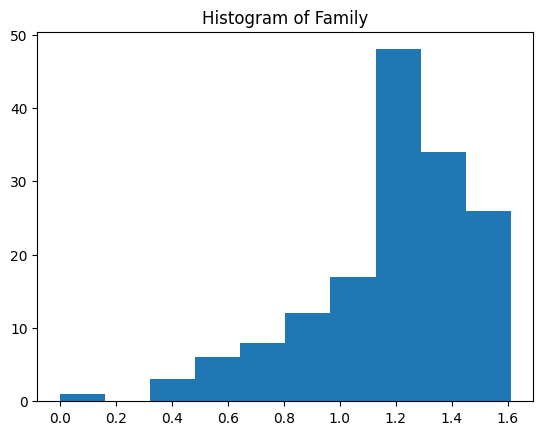

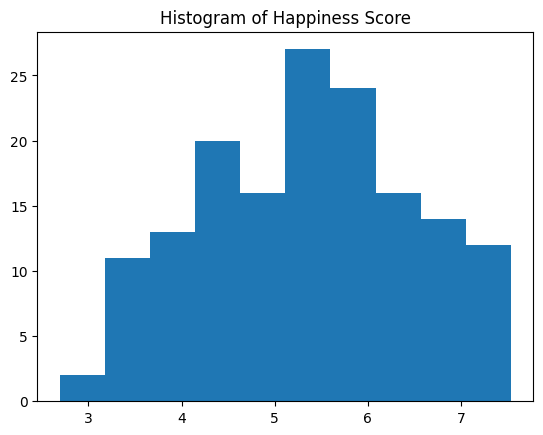

In [3]:
def plot_histogram(data, variable_name):
    _ = plt.hist(data, 10)
    plt.title("Histogram of " + variable_name)
    plt.show()


plot_histogram(inputs, 'Family')
plot_histogram(outputs, 'Happiness Score')

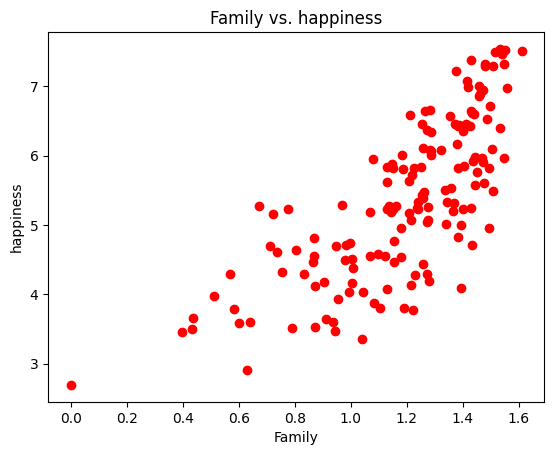

In [4]:
plt.plot(inputs, outputs, 'ro')
plt.xlabel('Family')
plt.ylabel('happiness')
plt.title('Family vs. happiness')
plt.show()

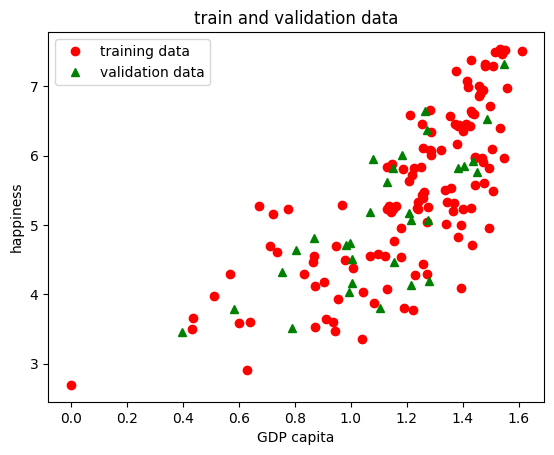

In [5]:
import random

indexes = [i for i in range(len(inputs))]
train_sample = random.sample(indexes, k=int(0.8 * len(indexes)))
validation_sample = [i for i in indexes if not i in train_sample]

train_inputs = [inputs[i] for i in train_sample]
train_outputs = [outputs[i] for i in train_sample]

validation_inputs = [inputs[i] for i in validation_sample]
validation_outputs = [outputs[i] for i in validation_sample]

plt.plot(train_inputs, train_outputs, 'ro', label='training data')  #train data are plotted by red and circle sign
plt.plot(validation_inputs, validation_outputs, 'g^',
         label='validation data')  #test data are plotted by green and a triangle sign
plt.title('train and validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [6]:
regressor = MyLinearUnivariateRegression()
regressor.fit(train_inputs, train_outputs)
w0, w1 = regressor.intercept_, regressor.coef_
print('the learnt model: f(x) = ', w0, ' + ', w1, ' * x')

the learnt model: f(x) =  1.8214486144221727  +  2.9819845580838353  * x


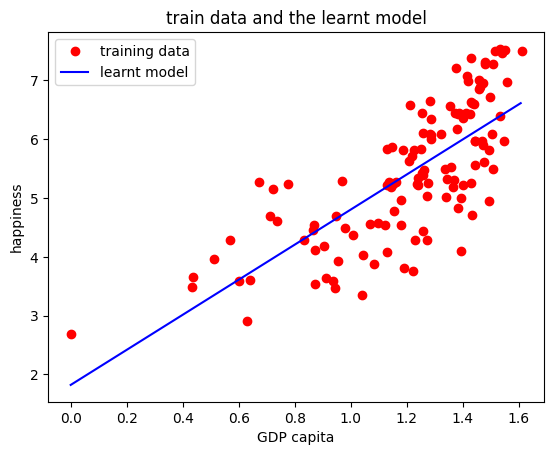

In [7]:
no_of_points = 1000
xref = []
val = min(train_inputs)
step = (max(train_inputs) - min(train_inputs)) / no_of_points
for i in range(1, no_of_points):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref]

plt.plot(train_inputs, train_outputs, 'ro', label='training data')
plt.plot(xref, yref, 'b-', label='learnt model')
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

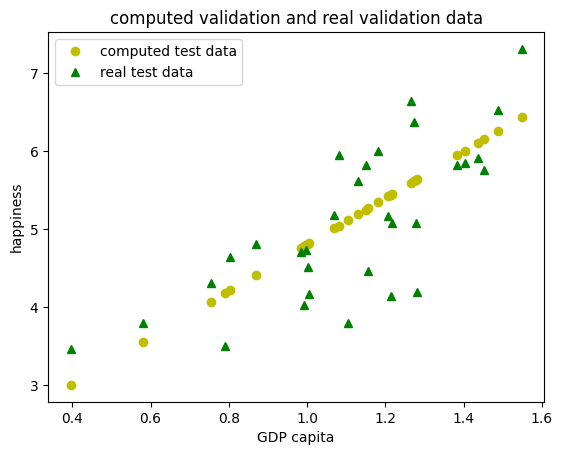

In [8]:
computed_validation_outputs = regressor.predict([[x] for x in validation_inputs])

plt.plot(validation_inputs, computed_validation_outputs, 'yo', label='computed test data')
plt.plot(validation_inputs, validation_outputs, 'g^', label='real test data')
plt.title('computed validation and real validation data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [9]:
error = 0.0
for t1, t2 in zip(computed_validation_outputs, validation_outputs):
    error += (t1 - t2) ** 2
error = error / len(validation_outputs)
print('prediction error (manual): ', error)

error2 = 0.0
for t1, t2 in zip(computed_validation_outputs, validation_outputs):
    error2 += abs(t1 - t2)
error2 = error2 / len(validation_outputs)
print('predicition error2 (manual with MAE)', error2)

prediction error (manual):  0.43406052269230605
predicition error2 (manual with MAE) 0.5439431090954847
